# The real meal time of patients

This code below serves to find the true estimated meal time because we noticed from the data that sometimes the glucose has already started increasing right before the meal was taken, which means that the recorded meal time was a little off. 

In this code, we compare the recorded reading to readings right before it and count how many were less than the recorded readings in a window size of variable number of minutes. (5mins, 10mins, 15mins, 20mins, 25mins, and 30mins)

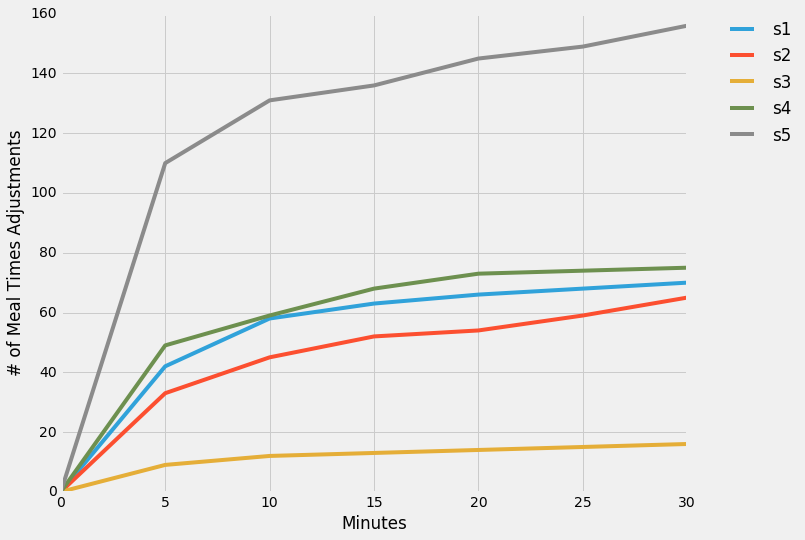

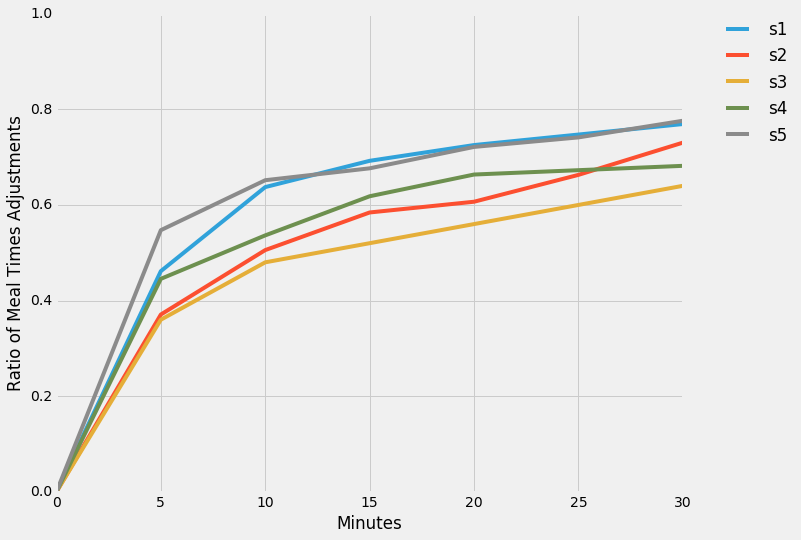

In [17]:
# %load "Meal Times Adjustment.py"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#if using interactive python, add line below
%matplotlib inline

#This is graph line style, from Nate silver
plt.style.use('fivethirtyeight')

## Matplotlib Variables
_FIG_SIZE = (10, 8)
_FIG_FORMAT = 'png'
_FIG_DPI = 100

#define the 5 series containing the number of adjusted readings per unit time
#patient 1-5
#index=[0,1,2,3,4,5])
#The following series has the total meal times per patient
s_Total_Meal_times = pd.Series ([91,89,25,110,201])
s1 = pd.Series([0,42,58,63,66,68,70], index=[0,5,10,15,20,25,30])
s2 = pd.Series([0,33,45,52,54,59,65], index=[0,5,10,15,20,25,30])
s3 = pd.Series([0,9,12,13,14,15,16], index=[0,5,10,15,20,25,30])
s4 = pd.Series([0,49,59,68,73,74,75], index=[0,5,10,15,20,25,30])
s5 = pd.Series([0,110,131,136,145,149,156], index=[0,5,10,15,20,25,30])

plt.figure(figsize=_FIG_SIZE)
plt.xlabel('Minutes')
plt.ylabel('# of Meal Times Adjustments')
#plt.legend(loc='upper right')
plt.title('');
s1.plot(label = "s1")
#or we plot using the line below
#plt.plot(s1, 'ro', label="Meal Times")
s2.plot(label = "s2")
s3.plot(label = "s3")
s4.plot(label = "s4")
s5.plot(label = "s5")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=_FIG_SIZE)
plt.xlabel('Minutes')
plt.ylabel('Ratio of Meal Times Adjustments')
plt.title('');
s1_ratio = pd.Series(s1/s_Total_Meal_times[0])
s2_ratio = pd.Series(s2/s_Total_Meal_times[1])
s3_ratio = pd.Series(s3/s_Total_Meal_times[2])
s4_ratio = pd.Series(s4/s_Total_Meal_times[3])
s5_ratio = pd.Series(s5/s_Total_Meal_times[4])
s1_ratio.plot(label = "s1")
s2_ratio.plot(label = "s2")
s3_ratio.plot(label = "s3")
s4_ratio.plot(label = "s4")
s5_ratio.plot(label = "s5")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis((0,30,0,1))
plt.show()

We can conclude from the plots above that readings right before the recorded meal time can be higher, especially within the 10mins that preceeds the recorded reading. Thus, the true meal time is usually 15min-20min before the recorded readings since the change flatens out after that (meaning that previous readings were actually higher). 

On a side note, we say true meal time above we refer to the time when the glucose started increasing. Realistically, the glucose start to increase 10mins-20mins after a meal, depeding on the size and type of meal. Thus, from our previous conclusion and this assumption, the real meal time is 25mins - 40mins before the recorded reading.